# Getting started with Task 2

Instructions:
- Download the dataset from the [ECG Heartbeat Categorization Dataset](https://www.kaggle.com/datasets/shayanfazeli/heartbeat)
- Unzip the `archive.zip` file
- Rename the folder `archive` as `ecg_dataset` and place it in tnotebook directory


References:
- [ECG Heartbeat Classification: A Deep Transferable Representation](https://arxiv.org/pdf/1805.00794.pdf)

## Load dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## MIT-BIH  Arrhythmia Dataset

- Number of Samples: 109446
- Number of Categories: 5
- Sampling Frequency: 125Hz
- Data Source: Physionet's MIT-BIH Arrhythmia Dataset
- Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
- Remark: All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 188.
- The final element of each row denotes the class to which that example belongs.


The shape of the mitbih_train is :  (87554, 188)
The shape of the mitbih_test is :  (21892, 188)
The last time value is :  1488.0


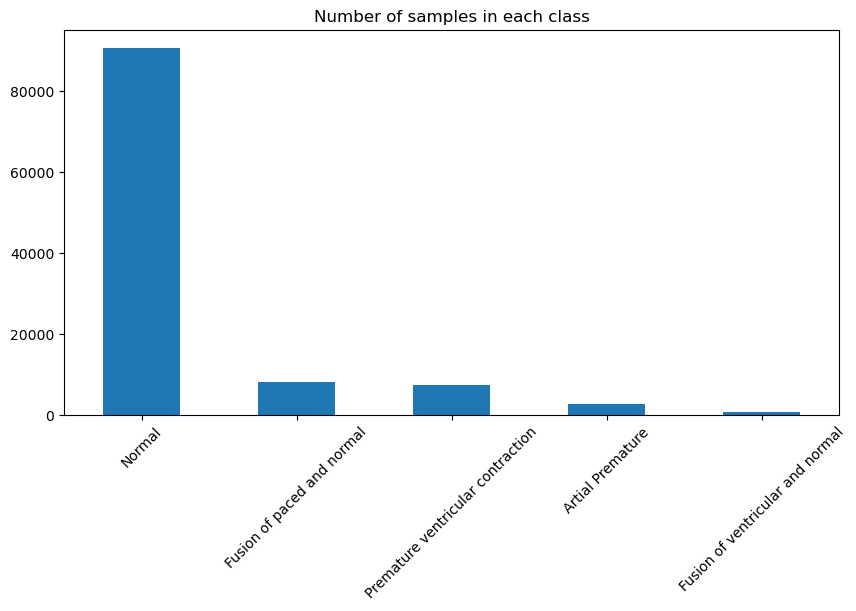

In [2]:
df_mitbih_train = pd.read_csv("../ecg_dataset/mitbih_train.csv", header = None)
df_mitbih_test = pd.read_csv("../ecg_dataset/mitbih_test.csv", header = None)

# print shapes of the dataframes
print("The shape of the mitbih_train is : ", df_mitbih_train.shape)
print("The shape of the mitbih_test is : ", df_mitbih_test.shape)

df_mitbih = pd.concat([df_mitbih_train, df_mitbih_test], axis=0)
df_mitbih.rename(columns={187: 'label'}, inplace=True)

id_to_label = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}
#df_mitbih['label'] = df_mitbih.iloc[:, -1].map(id_to_label)

# get the number of columns in the dataframe
# the last column is the label/class
num_cols = df_mitbih.shape[1] - 1 
# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000
# print last time value
print("The last time value is : ", time[-1])

# for the first "num_cols" and the time steps as column names
df_mitbih.columns = list(time) + ["label"]

# count the number of samples in each class and plot a bar chart
# change the class names to "normal" and "abnormal"
# count the number of samples in each class
counts = df_mitbih["label"].value_counts()
# substitute the class names
counts.index = counts.index.map(id_to_label)
# create a figure 
plt.figure(figsize = (10, 5))
# plot a bar chart
counts.plot(kind = "bar")
# plot xticks in angle
plt.xticks(rotation = 45)
plt.title("Number of samples in each class")
plt.show()

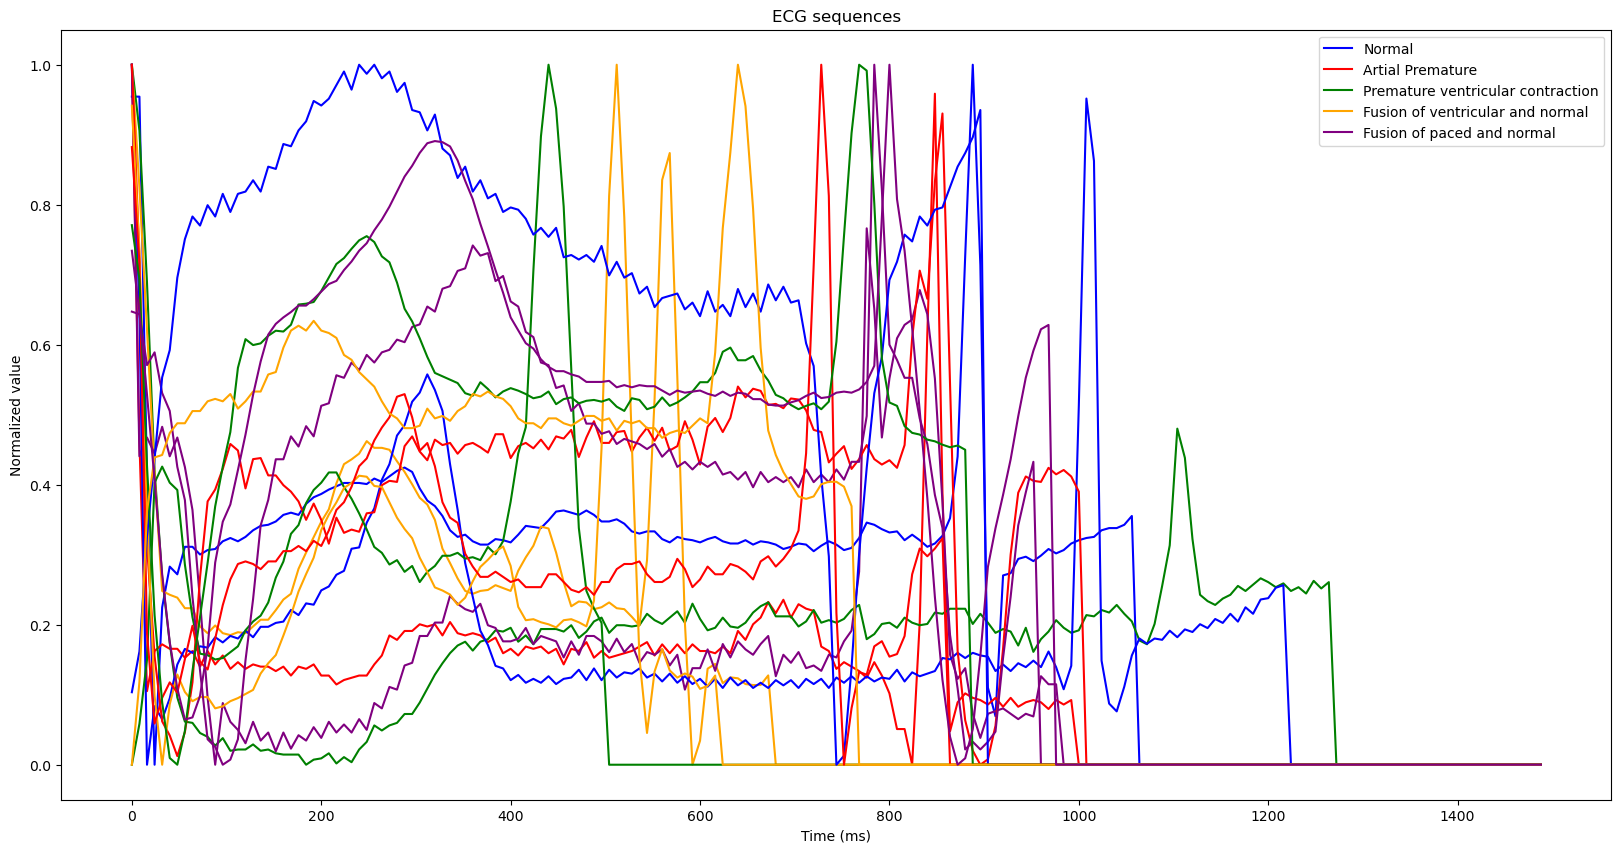

In [3]:
# create a figure
plt.figure(figsize = (20, 10))
# define colors for each class
colors = ["blue", "red", "green", "orange", "purple"]
# plot the normal sequences
for i in range(3):
    for label in id_to_label.keys():
        # sample a random sequence from that label
        df_mitbih_label = df_mitbih[df_mitbih["label"] == label].sample(1)
        # plot the sequence
        if i == 0:
            plt.plot(df_mitbih_label.columns[:-1], df_mitbih_label.iloc[0, :-1], label = id_to_label[label], color = colors[label])
        else:
            plt.plot(df_mitbih_label.columns[:-1], df_mitbih_label.iloc[0, :-1], color = colors[label])  
# create a legend for the plot, blue for normal and red for abnormal
plt.legend()
# set the title
plt.title("ECG sequences")
# y lable is "Normalized value"
plt.ylabel("Normalized value")
# x label is "Time (ms)"
plt.xlabel("Time (ms)")
# show the plot
plt.show()
# close
plt.close()

In [4]:
df_mitbih_train = pd.read_csv("../ecg_dataset/mitbih_train.csv", header = None)
df_mitbih_test = pd.read_csv("../ecg_dataset/mitbih_test.csv", header = None)

In [5]:
# Combine the datasets
df_mitbih = pd.concat([df_mitbih_train, df_mitbih_test], axis=0)

# Rename the label column
df_mitbih.rename(columns={187: 'label'}, inplace=True)

# Print shapes of the combined dataframe
print("The shape of the combined mitbih dataframe is:", df_mitbih.shape)

The shape of the combined mitbih dataframe is: (109446, 188)


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Processing Raw ECG signal as Inputs


In [10]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset

RANDOM_STATE = 0

In [25]:
# Split data into training, validation, and test sets
X = df_mitbih.iloc[:, :-1]  # Features
y = df_mitbih['label']       # Labels

# First, split into train and temporary (validation + test) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, stratify=y, random_state=RANDOM_STATE)

# Then, split the temporary set into validation and test sets
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=RANDOM_STATE)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_cv.shape)
print("Test set shape:", X_test.shape)
X_train = scaler.fit_transform(X_train)
X_cv = scaler.transform(X_cv)
X_test = scaler.transform(X_test)

print(type(X_train), type(X_cv), type(X_test))
print(type(y_train), type(y_cv), type(y_test))

Training set shape: (98501, 187)
Validation set shape: (5472, 187)
Test set shape: (5473, 187)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [26]:
# Count the number of instances for each class in the resampled training dataset
class_counts = y_train.value_counts().sort_index()

# Map the class IDs to their corresponding labels
class_counts_named = class_counts.rename(index=id_to_label)

# Print the number of instances for each class
print("Number of instances for each class in the resampled training dataset:")
print(class_counts_named)

Number of instances for each class in the resampled training dataset:
Normal                               81530
Artial Premature                      2501
Premature ventricular contraction     6512
Fusion of ventricular and normal       723
Fusion of paced and normal            7235
Name: label, dtype: int64


In [27]:
# Resample the training data
target_samples = 8039 * 2  # Desired number of samples per class

# Function to resample each class
def resample_class(X, y, target_samples, is_majority=False):
    if is_majority:
        return resample(X, y, replace=False, n_samples=target_samples, random_state=42)
    else:
        return resample(X, y, replace=True, n_samples=target_samples, random_state=42)

# Separate and resample the classes
X_train_resampled = pd.DataFrame()
y_train_resampled = pd.Series(dtype='int')

for label in y_train.unique():
    X_class = X_train[y_train == label]
    y_class = y_train[y_train == label]
    
    if label == 0:  # Undersample the majority class
        X_res, y_res = resample_class(X_class, y_class, target_samples, is_majority=True)
    else:  # Oversample the minority classes
        X_res, y_res = resample_class(X_class, y_class, target_samples, is_majority=False)
    
    X_train_resampled = pd.concat([X_train_resampled, pd.DataFrame(X_res)], axis=0)
    y_train_resampled = pd.concat([y_train_resampled, pd.Series(y_res)], axis=0)

# Shuffle the resampled training set using sample
X_train_resampled = X_train_resampled.sample(frac=1, random_state=42).reset_index(drop=True)
y_train_resampled = y_train_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Convert the resampled training data back to NumPy arrays
X_train_np = X_train_resampled.values
y_train_np = y_train_resampled.values

# The following are already NumPy arrays, so no need for `.values`
X_cv_np = X_cv
y_cv_np = y_cv.values  # Convert Series to NumPy array

X_test_np = X_test
y_test_np = y_test.values  # Convert Series to NumPy array

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_np, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32)

X_cv_tensor = torch.tensor(X_cv_np, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
y_cv_tensor = torch.tensor(y_cv_np, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_np, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
y_test_tensor = torch.tensor(y_test_np, dtype=torch.float32)

# Print shapes to verify
print(f"Shape of X_train_tensor: {X_train_tensor.shape}")
print(f"Shape of y_train_tensor: {y_train_tensor.shape}")

print(f"Shape of X_cv_tensor: {X_cv_tensor.shape}")
print(f"Shape of y_cv_tensor: {y_cv_tensor.shape}")

print(f"Shape of X_test_tensor: {X_test_tensor.shape}")
print(f"Shape of y_test_tensor: {y_test_tensor.shape}")


Shape of X_train_tensor: torch.Size([80390, 1, 187])
Shape of y_train_tensor: torch.Size([80390])
Shape of X_cv_tensor: torch.Size([5472, 1, 187])
Shape of y_cv_tensor: torch.Size([5472])
Shape of X_test_tensor: torch.Size([5473, 1, 187])
Shape of y_test_tensor: torch.Size([5473])


In [28]:
# Create DataLoader for training, validation, and test sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
cv_dataset = TensorDataset(X_cv_tensor, y_cv_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
cv_loader = DataLoader(cv_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
# # Convert to DataFrame if necessary
# if not isinstance(X_train, pd.DataFrame):
#     X_train = pd.DataFrame(X_train)
# if not isinstance(X_cv, pd.DataFrame):
#     X_cv = pd.DataFrame(X_cv)
# if not isinstance(X_test, pd.DataFrame):
#     X_test = pd.DataFrame(X_test)

# print(type(X_train), type(X_cv), type(X_test))
# print(type(y_train), type(y_cv), type(y_test))

# Processing Transformed ECG - GAF Images as Inputs


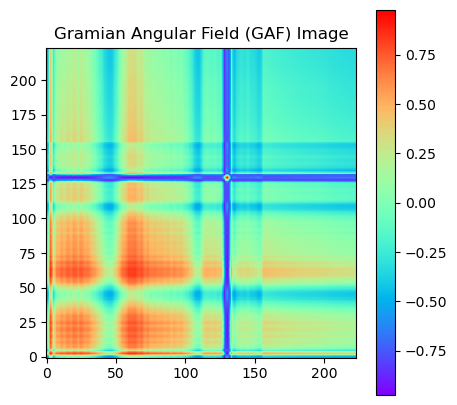

(187,)


In [30]:
from pyts.image import GramianAngularField
from skimage.transform import resize

def transform_ecg_to_gaf(signal, target_size=(224, 224)):
    # Set image size to the length of the signal if it's less than 224
    image_size = min(len(signal), 224)
    gaf = GramianAngularField(image_size=image_size, method='summation')
    signal = signal.reshape(1, -1)
    gaf_image = gaf.fit_transform(signal)[0]

    # Resize the image if it's not 224x224
    if gaf_image.shape != target_size:
        gaf_image = resize(gaf_image, target_size, mode='reflect', anti_aliasing=True)

    return gaf_image

# Example transformation for a chosen ECG signal
first_ecg_signal = X_train[0, :]  # Corrected indexing, no .values needed
gaf_image = transform_ecg_to_gaf(first_ecg_signal)

# Plot the GAF image
plt.figure(figsize=(5, 5))
plt.imshow(gaf_image, cmap='rainbow', origin='lower')
plt.title("Gramian Angular Field (GAF) Image")
plt.colorbar()
plt.show()

# Check the shape of the first signal in X_train
print(first_ecg_signal.shape)

Becuase GAF images become computationally expensive to load each time create a memory mapped array

In [33]:
# import numpy as np
# import os
# import sys
# import gc  # Import garbage collector

# # Ensure the directory exists
# os.makedirs('task2_GAF', exist_ok=True)

# # Function to calculate the memory usage of a variable
# def memory_usage(var):
#     return sys.getsizeof(var) / (1024**2)  # Convert bytes to megabytes

# # Process and save X_train and y_train in batches
# print("Processing X_train and y_train in batches...")

# # Define the number of batches
# num_batches = 10
# batch_size = len(X_train) // num_batches

# for i in range(num_batches):
#     start_idx = i * batch_size
#     end_idx = (i + 1) * batch_size if i != num_batches - 1 else len(X_train)
    
#     # Apply the transformation to the signals in the current batch
#     X_train_gaf_batch = np.array([transform_ecg_to_gaf(signal) for signal in X_train[start_idx:end_idx]])
    
#     # Flatten the GAF Images to 1D Feature Vectors
#     X_train_flat_batch = X_train_gaf_batch.reshape(X_train_gaf_batch.shape[0], -1)
    
#     # Get the corresponding labels
#     y_train_batch = y_train[start_idx:end_idx]
    
#     # Save the batch to a file
#     np.savez(f'task2_GAF/train_batch_{i}.npz', X_train_flat=X_train_flat_batch, y_train=y_train_batch)
    
#     print(f"Batch {i+1}/{num_batches} processed and saved.")
    
#     # Delete variables to free memory
#     del X_train_gaf_batch, X_train_flat_batch, y_train_batch
    
#     # Force garbage collection to free memory
#     gc.collect()

# print("All batches of X_train and y_train have been processed and saved successfully.")


In [34]:
# import numpy as np
# import os

# # Define the number of batches and the directory
# num_batches = 10
# directory = 'task2_GAF'

# # Assuming you know the shapes
# total_samples_train = 80390  # Replace this with the actual total number of training samples
# flat_feature_size = 224 * 224  # Replace this with the actual number of flattened features (e.g., 224*224)

# # Create memory-mapped arrays to hold the entire dataset
# X_train_flat_memmap = np.memmap('X_train_flat_memmap.dat', dtype='float32', mode='w+', shape=(total_samples_train, flat_feature_size))
# y_train_memmap = np.memmap('y_train_memmap.dat', dtype='float32', mode='w+', shape=(total_samples_train,))

# offset = 0
# for i in range(num_batches):
#     data = np.load(os.path.join(directory, f'train_batch_{i}.npz'))
#     batch_size = data['X_train_flat'].shape[0]
    
#     # Write each batch into the memory-mapped arrays
#     X_train_flat_memmap[offset:offset + batch_size] = data['X_train_flat']
#     y_train_memmap[offset:offset + batch_size] = data['y_train']
    
#     offset += batch_size

# # Finalize the memory-mapped files
# X_train_flat_memmap.flush()
# y_train_memmap.flush()

# print("X_train_flat and y_train have been loaded into memory-mapped files successfully.")
# print(f"Shape of X_train_flat_memmap: {X_train_flat_memmap.shape}")
# print(f"Shape of y_train_memmap: {y_train_memmap.shape}")


In [ ]:
# import numpy as np
# import sys
# import gc  # Import garbage collector

# # Function to calculate the memory usage of a variable
# def memory_usage(var):
#     return sys.getsizeof(var) / (1024**2)  # Convert bytes to megabytes

# # Process and save X_cv and y_cv
# print("Processing X_cv and y_cv...")

# # Apply the transformation to the signals in X_cv
# X_cv_gaf = np.array([transform_ecg_to_gaf(signal) for signal in X_cv])

# # Flatten the GAF Images to 1D Feature Vectors
# X_cv_flat = X_cv_gaf.reshape(X_cv_gaf.shape[0], -1)

# # Calculate memory usage for X_cv
# memory_usage_X_cv_gaf = memory_usage(X_cv_gaf)
# memory_usage_X_cv_flat = memory_usage(X_cv_flat)
# memory_usage_y_cv = memory_usage(y_cv)

# print(f"Memory usage of X_cv_gaf: {memory_usage_X_cv_gaf:.2f} MB")
# print(f"Memory usage of X_cv_flat: {memory_usage_X_cv_flat:.2f} MB")
# print(f"Memory usage of y_cv: {memory_usage_y_cv:.2f} MB")

# # Save the flattened arrays and labels to .npy files with 'task2_' prefix
# np.save('task2_X_cv_flat.npy', X_cv_flat)
# np.save('task2_y_cv.npy', y_cv)

# print("Flattened GAF images and labels for X_cv have been saved successfully with 'task2_' prefix.")

# # Delete variables to free memory
# del X_cv_gaf, X_cv_flat

# # Force garbage collection to free memory
# gc.collect()

# print("X_cv and y_cv variables deleted and memory freed.")

# # Process and save X_test and y_test
# print("Processing X_test and y_test...")

# # Apply the transformation to the signals in X_test
# X_test_gaf = np.array([transform_ecg_to_gaf(signal) for signal in X_test])

# # Flatten the GAF Images to 1D Feature Vectors
# X_test_flat = X_test_gaf.reshape(X_test_gaf.shape[0], -1)

# # Calculate memory usage for X_test
# memory_usage_X_test_gaf = memory_usage(X_test_gaf)
# memory_usage_X_test_flat = memory_usage(X_test_flat)
# memory_usage_y_test = memory_usage(y_test)

# print(f"Memory usage of X_test_gaf: {memory_usage_X_test_gaf:.2f} MB")
# print(f"Memory usage of X_test_flat: {memory_usage_X_test_flat:.2f} MB")
# print(f"Memory usage of y_test: {memory_usage_y_test:.2f} MB")

# # Save the flattened arrays and labels to .npy files with 'task2_' prefix
# np.save('task2_X_test_flat.npy', X_test_flat)
# np.save('task2_y_test.npy', y_test)

# print("Flattened GAF images and labels for X_test have been saved successfully with 'task2_' prefix.")

# # Delete variables to free memory
# del X_test_gaf, X_test_flat

# # Force garbage collection to free memory
# gc.collect()

# print("X_test and y_test variables deleted and memory freed.")


Once arrays are created, comment and load for further work

In [ ]:
# Define the shapes
total_samples_train = 80390  # Replace with the actual number of samples
flat_feature_size = 224 * 224  # Replace with the actual size of flattened features

# Load the memory-mapped arrays
X_train_flat = np.memmap('X_train_flat_memmap.dat', dtype='float32', mode='r+', shape=(total_samples_train, flat_feature_size))
y_train = np.memmap('y_train_memmap.dat', dtype='float32', mode='r+', shape=(total_samples_train,))

# Now you can use X_train_flat_memmap and y_train_memmap just like normal NumPy arrays
print("Memory-mapped files loaded successfully.")
print(f"Shape of X_train_flat_memmap: {X_train_flat.shape}")
print(f"Shape of y_train_memmap: {y_train.shape}")

In [ ]:
# Load X_test and y_test
X_test_flat = np.load('task2_X_test_flat.npy')
y_test = np.load('task2_y_test.npy')

print("X_test_flat and y_test have been loaded successfully.")
print(f"Shape of X_test_flat: {X_test_flat.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Load X_cv and y_cv
X_cv_flat = np.load('task2_X_cv_flat.npy')
y_cv = np.load('task2_y_cv.npy')

print("X_cv_flat and y_cv have been loaded successfully.")
print(f"Shape of X_cv_flat: {X_cv_flat.shape}")
print(f"Shape of y_cv: {y_cv.shape}")

In [ ]:
# Now you can use X_train_flat_memmap and y_train_memmap just like normal NumPy arrays
print("Memory-mapped files loaded successfully.")
print(f"Shape of X_train_flat_memmap: {X_train_flat.shape}")
print(f"Shape of y_train_memmap: {y_train.shape}")
print("X_test_flat and y_test have been loaded successfully.")
print(f"Shape of X_test_flat: {X_test_flat.shape}")
print(f"Shape of y_test: {y_test.shape}")
print("X_cv_flat and y_cv have been loaded successfully.")
print(f"Shape of X_cv_flat: {X_cv_flat.shape}")
print(f"Shape of y_cv: {y_cv.shape}")

Dataset is ready to be trained on!